**Final Project (29cm)** 
# 데이터 전처리 및 탐색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_column', 1000)
pd.options.display.float_format = '{:.2f}'.format

import random
from tqdm.autonotebook import tqdm
import string
import re


## 파일 불러오기

In [2]:
events = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_events.csv")
products = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_products.csv")
users = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_users.csv")

In [3]:
ad = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/ad.csv")
advertiser = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/advertiser.csv")
dataset = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/dataset.csv")
impression_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/impression_log.csv")
view_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/view_log.csv")
viewer = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/viewer.csv")

## 데이터 살펴보기

In [4]:
events.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
3,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
4,3316370366bdbd2fdff02e996c1b2721,2021-06-03 13:00:03.312001,add_to_cart,frWHEf/czsCEjklEIwxxKA==,yXpbzgtgRe37PEbJlBiKmQ==,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID


In [5]:
events.describe()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
count,5880407,5880407,5880407,5880407,5880407,5880407,5876813,5876813,1629466,5880407,5880395,5878212,5880407
unique,1425915,5830374,4,254958,283326,2,19,475,229,80,59,197,2
top,e66c96573506e70fc41cd9eef8327547,2021-06-22 10:07:05.720234,click_item,b2xZVfUtjyGsZckO7j6zkg==,Q0FgPI5gYPwi7sDRXYc2MA==,mobile,Apple,iPhone,Galaxy Note10 5G,iOS 14.6,South Korea,Seoul,IOS
freq,933,7,4845691,7858,8836,5853335,4241405,2680251,121521,2908354,5863296,2897803,4241406


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880407 entries, 0 to 5880406
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   event_timestamp           object
 2   event_name                object
 3   user_no                   object
 4   item_no                   object
 5   device_type               object
 6   mobile_brand_name         object
 7   mobile_model_name         object
 8   mobile_marketing_name     object
 9   operating_system_version  object
 10  country                   object
 11  region                    object
 12  platform                  object
dtypes: object(13)
memory usage: 583.2+ MB


In [7]:
events.isnull().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
dtype: int64

In [8]:
products.head()

,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.00,243100100,의류,243101100,아우터,243101103,코트,4308.00,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.00,243100100,의류,243102100,상의,243102103,티셔츠,9302.00,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.00,249100100,식품,249105100,음료,249105105,차류,4775.00,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.00,244100100,잡화,244102100,가방,244102104,토트백,2546.00,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.00,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.00,밀크바오밥


In [9]:
products.describe()

,price,category1_code,category2_code,category3_code,brand_no
count,283326.00,283326.00,283326.00,283326.00,283323.00
mean,122139.69,244839227.37,244831694.77,244831674.25,7903.39
std,238087.56,2661239.03,2637422.36,2637472.21,4049.18
min,0.00,234100100.00,234105100.00,234105104.00,441.00
25%,36000.00,243100100.00,243102100.00,243102106.00,4288.00
50%,69000.00,244100100.00,244101100.00,244101112.00,7899.00
75%,139000.00,244100100.00,244110100.00,244110101.00,11354.00
max,14298000.00,267100100.00,259103100.00,259103106.00,15737.00


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283326 entries, 0 to 283325
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   item_no         283326 non-null  object 
 1   item_name       283326 non-null  object 
 2   image_name      283326 non-null  object 
 3   price           283326 non-null  float64
 4   category1_code  283326 non-null  int64  
 5   category1_name  283326 non-null  object 
 6   category2_code  283326 non-null  int64  
 7   category2_name  283326 non-null  object 
 8   category3_code  283326 non-null  int64  
 9   category3_name  283326 non-null  object 
 10  brand_no        283323 non-null  float64
 11  brand_name      283307 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 25.9+ MB


In [11]:
users.head()

,user_no,birth_date,gender
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F


In [12]:
users.describe()

,user_no,birth_date,gender
count,254958,231282,214010
unique,254958,16325,2
top,++MXKfwkOw4VFn9HkVCRrw==,1990-02-28,F
freq,1,85,163130


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254958 entries, 0 to 254957
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_no     254958 non-null  object
 1   birth_date  231282 non-null  object
 2   gender      214010 non-null  object
dtypes: object(3)
memory usage: 5.8+ MB


## 데이터 users, products를 events에 병합

In [14]:
df = pd.merge(events, products, how = 'outer', on = 'item_no')

In [15]:
df = pd.merge(df, users, how = 'outer', on = 'user_no')

In [16]:
df.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 이지 쇼츠,13551f740ecacbcce3baf5e232f0fb9b,19900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 치노 밴딩 팬츠,569712813f195e07974c740aeb70f7b2,39900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 쿨터치 사이드밴드 슬랙스,54df4e65f4b1dfe66273203fbd3c8d23,49900.00,243100100,의류,243102100,상의,243102103,티셔츠,13901.00,TOPTEN,1969-04-05,F
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,[Laslow] SeasonUnit Sigma F (남여공용),3cd917571a5f2a26eb01587d0276227a,65000.00,244100100,잡화,244101100,신발,244101112,슬리퍼,11481.00,LASLOW,1969-04-05,F


In [17]:
df.describe()

,price,category1_code,category2_code,category3_code,brand_no
count,5880407.00,5880407.00,5880407.00,5880407.00,5880236.00
mean,94651.86,244233318.67,244202638.06,244202639.54,7254.33
std,116924.85,2390333.62,2278878.04,2278883.72,4307.78
min,0.00,234100100.00,234105100.00,234105104.00,441.00
25%,39700.00,243100100.00,243102100.00,243102105.00,3268.00
50%,69000.00,243100100.00,243104100.00,243104102.00,6513.00
75%,119000.00,244100100.00,244102100.00,244102108.00,11359.00
max,14298000.00,267100100.00,259103100.00,259103106.00,15737.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880407 entries, 0 to 5880406
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   event_timestamp           object 
 2   event_name                object 
 3   user_no                   object 
 4   item_no                   object 
 5   device_type               object 
 6   mobile_brand_name         object 
 7   mobile_model_name         object 
 8   mobile_marketing_name     object 
 9   operating_system_version  object 
 10  country                   object 
 11  region                    object 
 12  platform                  object 
 13  item_name                 object 
 14  image_name                object 
 15  price                     float64
 16  category1_code            int64  
 17  category1_name            object 
 18  category2_code            int64  
 19  category2_name            object 
 20  category3_code          

In [19]:
df.isnull().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
item_name                         0
image_name                        0
price                             0
category1_code                    0
category1_name                    0
category2_code                    0
category2_name                    0
category3_code                    0
category3_name                    0
brand_no                        171
brand_name                      209
birth_date                   296901
gender                       664253
dtype: int64

In [20]:
df.columns

Index(['session_id', 'event_timestamp', 'event_name', 'user_no', 'item_no',
       'device_type', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'operating_system_version', 'country',
       'region', 'platform', 'item_name', 'image_name', 'price',
       'category1_code', 'category1_name', 'category2_code', 'category2_name',
       'category3_code', 'category3_name', 'brand_no', 'brand_name',
       'birth_date', 'gender'],
      dtype='object')

## 전처리

<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

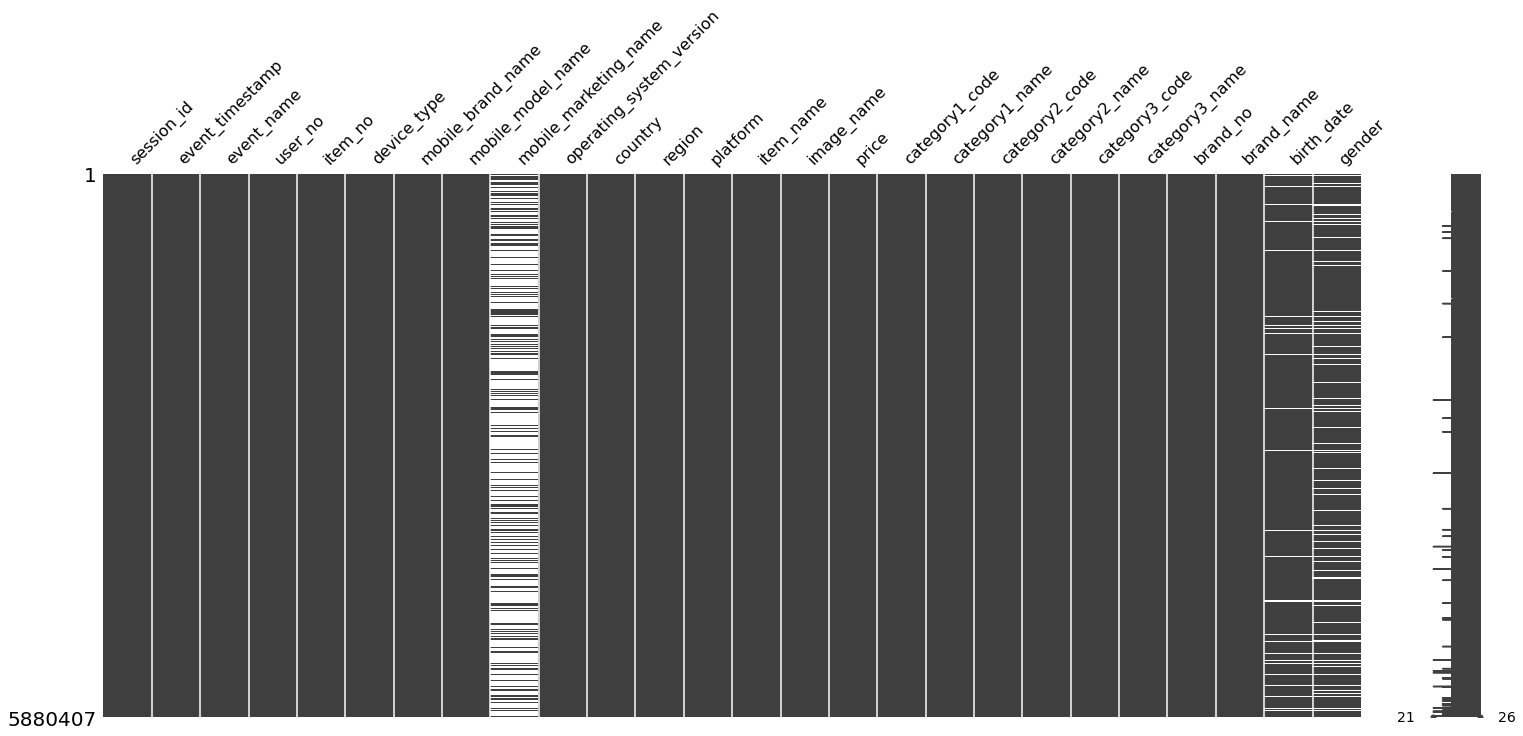

In [21]:
import missingno
plt.figure(figsize=(20, 8))
missingno.matrix(df)

In [22]:
df[df['brand_no'].isnull()]['category3_name']

5182              홑이불
97920             홑이불
113590            홑이불
131125            홑이불
172441            홑이불
214005            홑이불
214006            홑이불
304408         스크럽/필링
466020            홑이불
489614            홑이불
550939            홑이불
565094         스크럽/필링
666353            홑이불
720538            홑이불
921462            홑이불
921463            홑이불
921464            홑이불
980180            홑이불
986598            홑이불
994956            홑이불
1022433           홑이불
1022434           홑이불
1061909    전기장판/담요/방석
1086083           홑이불
1086084           홑이불
1130517           홑이불
1185535           홑이불
1224013           홑이불
1260612           홑이불
1295597           홑이불
1295598           홑이불
1295599           홑이불
1356374           홑이불
1374755           홑이불
1396856           홑이불
1396857           홑이불
1396858           홑이불
1396859           홑이불
1630925           홑이불
1670043           홑이불
1690490           홑이불
1696830           홑이불
1696831           홑이불
1748472           홑이불
1801524           홑이불
1816397   

In [23]:
df[df['brand_name'].isnull()]

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
5182,763ab1b19e8e3991ff9218ce5359a71f,2021-07-04 20:01:55.572042,add_to_cart,Z43x86qhuMolAFoar3mxsA==,MX61jTuPfTuiduEPnmSMWQ==,mobile,LG,LM-G710N,G7 ThinQ,Android 10,South Korea,Seoul,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1955-01-28,M
97920,f3f036bbd89c2b4ffbcadf301780c82d,2021-07-19 09:10:57.963021,add_to_cart,lzPsctUB8xw2z5dr+Y/T1Q==,MX61jTuPfTuiduEPnmSMWQ==,mobile,Samsung,SM-A716S,Galaxy A71 5G,Android 11,South Korea,Seoul,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1980-11-26,F
113590,ca11285c10c8f540ba4044fadcb7ee6f,2021-07-03 17:29:15.639026,add_to_cart,Mm1zk6eThKtE2ZdEGp0mvw==,MX61jTuPfTuiduEPnmSMWQ==,mobile,Samsung,SM-G965N,Galaxy S9+,Android 10,South Korea,Daegu,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1992-08-01,NaN
131125,25c2fb9df4dd33f19f6e5812cdbfa418,2021-07-04 22:14:45.521001,add_to_cart,RVSXJsTh6MBDesY4jItfhQ==,MX61jTuPfTuiduEPnmSMWQ==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1988-03-27,F
172441,6d44cde2d6b20aba8e2a8b5951f5cdfd,2021-07-03 21:19:15.27605,like_item,hl91o/AJ9eol2V4zNBRfXQ==,MX61jTuPfTuiduEPnmSMWQ==,mobile,Samsung,SM-N976N,Galaxy Note10+ 5G,Android 11,South Korea,Seoul,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1979-05-23,F
214005,9c6ca5a1485d958cbb1c8b3bd1f1a594,2021-07-03 23:36:52.009009,add_to_cart,zBtNVviKfnJ5yi6xaubHww==,MX61jTuPfTuiduEPnmSMWQ==,mobile,LG,V300S,V30,Android 9,South Korea,Gyeonggi-do,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1977-12-13,F
214006,9c6ca5a1485d958cbb1c8b3bd1f1a594,2021-07-04 00:52:51.197134,purchase_success,zBtNVviKfnJ5yi6xaubHww==,MX61jTuPfTuiduEPnmSMWQ==,mobile,LG,V300S,V30,Android 9,South Korea,Gyeonggi-do,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1977-12-13,F
304408,8b0c76640949beb0d39f820b1e965621,2021-06-06 22:13:49.722044,like_item,XhC4o0a5qal+4B4hzYWrhg==,69tL1qKgc0XIaMyTHS4ONg==,mobile,Samsung,SM-F707N,Galaxy Z Flip 5G,Android 11,South Korea,Seoul,ANDROID,그린티 모이스트 파하 거즈 필링(30매),2d1c5a576ad291c8665893776aaefd14,22900.00,247100100,화장품/미용,247103100,클렌징,247103111,스크럽/필링,NaN,NaN,1994-07-29,F
466020,9942f1b1e72ab9f310a56a6348cbf56f,2021-07-03 07:51:54.56701,like_item,A7Dgi4c9m13k7DbXkzgP3g==,MX61jTuPfTuiduEPnmSMWQ==,mobile,Samsung,SM-A908N,Galaxy A90 5G,Android 11,South Korea,Gyeongsangbuk-do,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1996-12-11,M
489614,d748864e283e76b99d19cf28e186ef3a,2021-07-04 21:28:08.068008,add_to_cart,izNExFWuFjWoMA1nmVgPQQ==,MX61jTuPfTuiduEPnmSMWQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Seoul,ANDROID,[프리미엄침구] 시원한 시어서커/인견 여름이불 모음,86d4c342ca33b84ee7d06213439eef65,35000.00,248100100,가구/인테리어,248107100,침구단품,248107105,홑이불,NaN,NaN,1991-06-22,M


**브랜드 네임 없는 경우 대부분 홑이불**

### Users 생년월일 --> 날짜데이터, Null값 처리


In [24]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors = 'coerce')

In [25]:
type(df['birth_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
df['birth_date'].isnull().sum()

335636

In [27]:
def convert_datetime(row):
    if pd.isnull(row):
        return np.nan
    else:
        return pd.to_datetime(row)

In [28]:
df['birth_date'] = df['birth_date'].apply(convert_datetime)

In [29]:
df['birth_date'].describe()

count                 5544771
unique                  15790
top       1978-01-23 00:00:00
freq                     8041
first     1923-12-12 00:00:00
last      2017-07-17 00:00:00
Name: birth_date, dtype: object

In [30]:
df_year = df['birth_date'].dt.year

In [31]:
df_year.max()

2017.0

In [32]:
x = df_year.unique()
x

array([1969., 1977., 1986., 1996., 1994., 1998., 1982., 1987., 2002.,
         nan, 2004., 1988., 1991., 1989., 1990., 1985., 1979., 1999.,
       1978., 1992., 1981., 1984., 1980., 1995., 1968., 2001., 1965.,
       1974., 1955., 1972., 1993., 1997., 1983., 2000., 2003., 1975.,
       1954., 1973., 2005., 1956., 1976., 1964., 1971., 2006., 1970.,
       1962., 1961., 1966., 1963., 1967., 1960., 1946., 1948., 1959.,
       1941., 1951., 1952., 1947., 1958., 1953., 1957., 2007., 1933.,
       1944., 1950., 1949., 2011., 1943., 1942., 1930., 1945., 1928.,
       1936., 2009., 1939., 1923., 2008., 1934., 1940., 1931., 2017.,
       1938., 1937., 2013., 2014., 1924., 2010., 1929., 1932., 2012.])

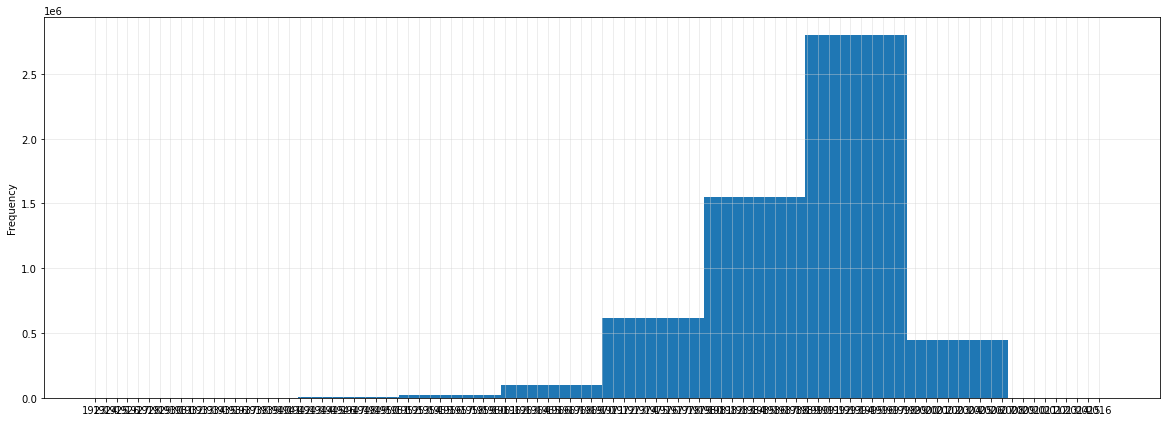

In [33]:
plt.figure(figsize=(20, 7))
a = df_year.plot(kind='hist')
a.get_xaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.5)
plt.xticks(np.arange(1923,2017))
plt.show()

### Users 성별

In [34]:
df['gender'].value_counts()

F    4376513
M     839641
Name: gender, dtype: int64

여성 회원 다수

### Products 카테고리

In [36]:
df_category = df.groupby(['category1_name'])['session_id'].count().sort_values(ascending=False).\
reset_index()

#비중
for i in range(len(df_category)):
    df_category['비중'] = df_category['session_id']/df_category['session_id'].sum() * 100

df_category

,category1_name,session_id,비중
0,의류,3566308,60.65
1,잡화,1478703,25.15
2,생활/건강,263836,4.49
3,가구/인테리어,211389,3.59
4,디지털/가전,137124,2.33
5,화장품/미용,74104,1.26
6,식품,47523,0.81
7,스포츠/레저,44323,0.75
8,컬처,32769,0.56
9,키즈,10967,0.19


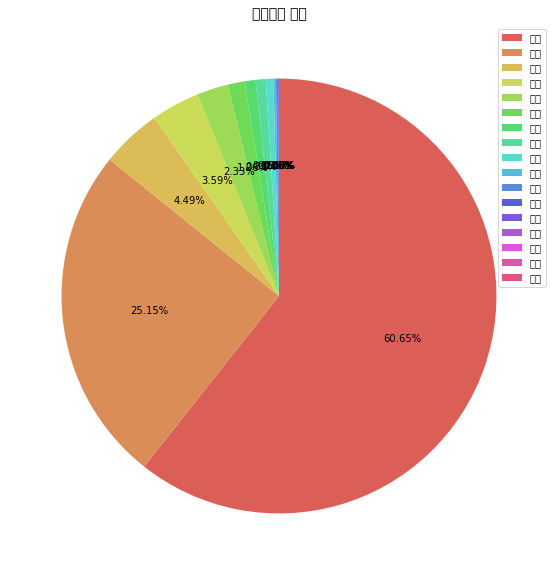

In [41]:
colors = sns.color_palette('hls', len(df_category['category1_name'])) 

fig = plt.figure(figsize=(10, 10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(df_category['비중'], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.title('카테고리 비중', fontsize=14)
plt.legend(pie[0], df['category1_name']) 